<a href="https://colab.research.google.com/github/G33kyGuy3/DataSci/blob/main/EmployeeAttrition_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : Using KNN to predict employee attrition

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
#Get the data
df = pd.read_excel("/content/Employee Attrition Data.xlsx", index_col = 0)

df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41,No,Non-Travel,247,Research & Development,7,1,Life Sciences,1,1035,2,Female,55,1,5,Research Director,3,Divorced,19973,20284,1,Y,No,22,4,2,80,2,21,3,3,21,16,5,10
52,Yes,Travel_Rarely,266,Sales,2,1,Marketing,1,1038,1,Female,57,1,5,Manager,4,Married,19845,25846,1,Y,No,15,3,4,80,1,33,3,3,32,14,6,9
39,No,Travel_Frequently,1218,Research & Development,1,1,Life Sciences,1,531,2,Male,52,3,5,Manager,3,Divorced,19197,8213,1,Y,Yes,14,3,3,80,1,21,3,3,21,8,1,6
49,No,Travel_Frequently,1064,Research & Development,2,1,Life Sciences,1,1941,2,Male,42,3,5,Research Director,4,Married,19161,13738,3,Y,No,15,3,4,80,0,28,3,3,5,4,4,3
50,No,Travel_Rarely,797,Research & Development,4,1,Life Sciences,1,385,1,Male,96,3,5,Research Director,2,Divorced,19144,15815,3,Y,No,14,3,1,80,2,28,4,2,10,4,1,6


In [7]:
#Remove some useless columns
df = df.drop('Over18', axis= 1)
df = df.drop('EmployeeNumber', axis= 1)
df = df.drop('StandardHours', axis = 1)
df = df.drop('EmployeeCount', axis = 1)

In [8]:
#Transform the data
#Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [9]:
# Standardize the Variables
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(df.drop('Attrition', axis = 1)) 
scaled_features = scaler.transform(df.drop('Attrition', axis = 1)) 
  
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) 
df_feat.head() 

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,-2.416437,-1.377418,-0.493817,-0.270544,-1.868426,-0.937414,-0.660531,-1.224745,-0.535916,-2.432006,2.653309,0.220033,0.246200,-1.503385,1.780588,0.830123,-0.678049,-0.628241,1.855984,2.346151,-0.658973,1.415991,1.250678,0.155707,0.338096,2.315141,3.249878,0.873006,1.647603
1,0.590048,-1.326121,1.401512,-0.887515,-1.868426,-0.186052,-1.575686,-1.224745,-0.437503,-2.432006,2.653309,-0.592651,1.153254,-0.133282,1.767722,1.612271,-0.678049,-0.628241,-0.057267,-0.426230,1.191438,0.241988,2.794445,0.155707,0.338096,3.967769,2.697683,1.183437,1.367249
2,-0.913194,1.001966,-0.493817,-1.010909,-1.868426,-0.937414,-0.660531,0.816497,-0.683535,0.379672,2.653309,-0.592651,0.246200,-1.503385,1.690526,-0.850765,-0.678049,1.591746,-0.330589,-0.426230,0.266233,0.241988,1.250678,0.155707,0.338096,2.315141,1.041095,-0.368715,0.526188
3,-0.913194,0.623159,-0.493817,-0.887515,-1.868426,-0.937414,-0.660531,0.816497,-1.175601,0.379672,2.653309,0.220033,1.153254,-0.133282,1.680233,-0.075905,0.122861,-0.628241,-0.057267,-0.426230,1.191438,-0.932014,2.151209,0.155707,0.338096,-0.329064,-0.063296,0.562576,-0.314873
4,0.590048,-0.000295,-0.493817,-0.640727,-1.868426,-0.937414,-1.575686,0.816497,1.481551,0.379672,2.653309,0.220033,-0.660853,-1.503385,1.677660,0.188860,0.122861,-0.628241,-0.330589,-0.426230,-1.584178,1.415991,2.151209,0.931603,-1.077862,0.497250,-0.063296,-0.368715,0.526188


In [11]:
#Train Test Split Data and Use KNN model from sklearn library
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
      scaled_features, df['Attrition'], test_size = 0.30) 
  
# Remember that we are trying to come up 
# with a model to predict whether 
# someone will TARGET CLASS or not. 
# We'll start with k = 1. 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 1) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 
  
# Predictions and Evaluations 
# Let's evaluate our KNN model !  
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 

[[333  38]
 [ 54  16]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       371
           1       0.30      0.23      0.26        70

    accuracy                           0.79       441
   macro avg       0.58      0.56      0.57       441
weighted avg       0.77      0.79      0.78       441



Text(0, 0.5, 'Error Rate')

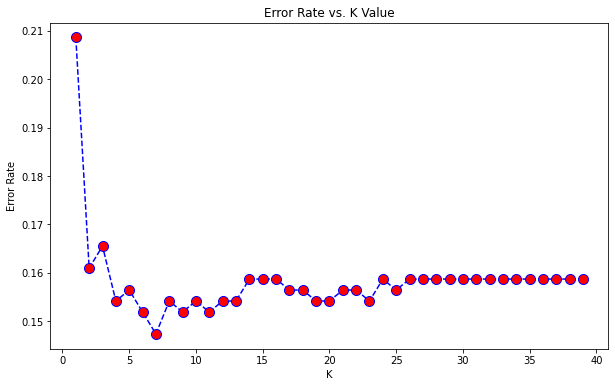

In [12]:
#Choosing a K value
error_rate = [] 
  
# Will take some time 
for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test)) 
  
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

In [13]:
#Retraining the model 
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1 
knn = KNeighborsClassifier(n_neighbors = 1) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 
  
print('WITH K = 1') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred)) 
  
  
# NOW WITH K = 15 
knn = KNeighborsClassifier(n_neighbors = 15) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 
  
print('WITH K = 15') 
print('\n') 
print(confusion_matrix(y_test, pred)) 
print('\n') 
print(classification_report(y_test, pred)) 

WITH K = 1


[[333  38]
 [ 54  16]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       371
           1       0.30      0.23      0.26        70

    accuracy                           0.79       441
   macro avg       0.58      0.56      0.57       441
weighted avg       0.77      0.79      0.78       441

WITH K = 15


[[371   0]
 [ 70   0]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
